In [3]:
ways <- c(0, 3, 8, 9, 0)
ways/sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

In [1]:
library("rstan")

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [4]:
dbinom(6, size=9, prob=0.5) # 6 heads out of 9 tosses of a fair coin

[1] 0.1640625

In [9]:
# define grid
p_grid <- seq(from=0, to=1, length.out=200)

# define prior
prior <- rep(1, 20)
prior <- ifelse(p_grid < 0.5, 0, 1)
# prior <- exp(-5 * abs(p_grid - 0.5))

# compute likelihood at each value in grid
likelihood <- dbinom(6, size=9, prob=p_grid)

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

In [11]:
3 / 13

[1] 0.2307692

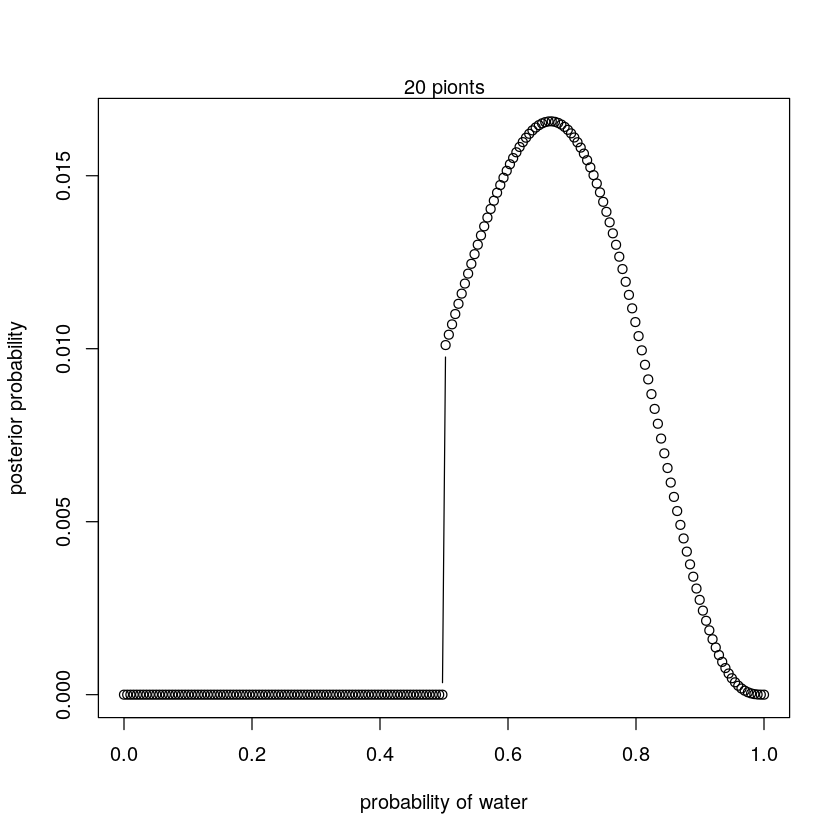

In [10]:
plot(p_grid, posterior, type="b", xlab="probability of water", ylab="posterior probability")
mtext("20 pionts")

In [1]:
# install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking")

backports    (1.1.4     -> 1.2.1    ) [CRAN]
BH           (1.69.0-1  -> 1.75.0-0 ) [CRAN]
checkmate    (1.9.1     -> 2.0.0    ) [CRAN]
coda         (0.19-2    -> 0.19-4   ) [CRAN]
colorspace   (1.4-1     -> 2.0-0    ) [CRAN]
crayon       (1.3.4     -> 1.4.1    ) [CRAN]
curl         (3.3       -> 4.3      ) [CRAN]
desc         (1.2.0     -> 1.3.0    ) [CRAN]
digest       (0.6.18    -> 0.6.27   ) [CRAN]
fansi        (0.4.0     -> 0.4.2    ) [CRAN]
farver       (NA        -> 2.1.0    ) [CRAN]
ggplot2      (3.1.1     -> 3.3.3    ) [CRAN]
glue         (1.3.1     -> 1.4.2    ) [CRAN]
inline       (0.3.15    -> 0.3.17   ) [CRAN]
isoband      (NA        -> 0.2.4    ) [CRAN]
labeling     (0.3       -> 0.4.2    ) [CRAN]
lattice      (0.20-38   -> 0.20-41  ) [CRAN]
magrittr     (1.5       -> 2.0.1    ) [CRAN]
MASS         (7.3-51.3  -> 7.3-53.1 ) [CRAN]
Matrix       (1.2-17    -> 1.3-2    ) [CRAN]
matrixStats  (0.54.0    -> 0.58.0   ) [CRAN]
mgcv         (1.8-28    -> 1.8-34   ) [CRAN]
mvtnorm   

Installing 40 packages: backports, BH, checkmate, coda, colorspace, crayon, curl, desc, digest, fansi, farver, ggplot2, glue, inline, isoband, labeling, lattice, magrittr, MASS, Matrix, matrixStats, mgcv, mvtnorm, nlme, pillar, pkgconfig, prettyunits, R6, Rcpp, RcppEigen, RcppParallel, rprojroot, rstan, scales, shape, StanHeaders, tibble, utf8, V8, vctrs
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


✔  checking for file ‘/tmp/Rtmpog6GV7/remotes1a61b2a948245/rmcelreath-rethinking-3b48ec8/DESCRIPTION’ ...
─  preparing ‘rethinking’:
✔  checking DESCRIPTION meta-information ...
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘rethinking_2.13.tar.gz’
   


In [1]:
library("rethinking")

Loading required package: rstan
Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 2.13)

Attaching package: ‘rethinking’

The following object is masked from ‘package:stats’:

    rstudent



In [3]:
globe.qa <- quap(
    alist(
        W ~ dbinom(W + L, p), # binomial likelihood
        p ~ dunif(0, 1) # uniform prior
    ), 
    data=list(W=6, L=3)
)

precis(globe.qa)

,mean,sd,5.5%,94.5%
p,0.6666662,0.1571339,0.4155359,0.9177965


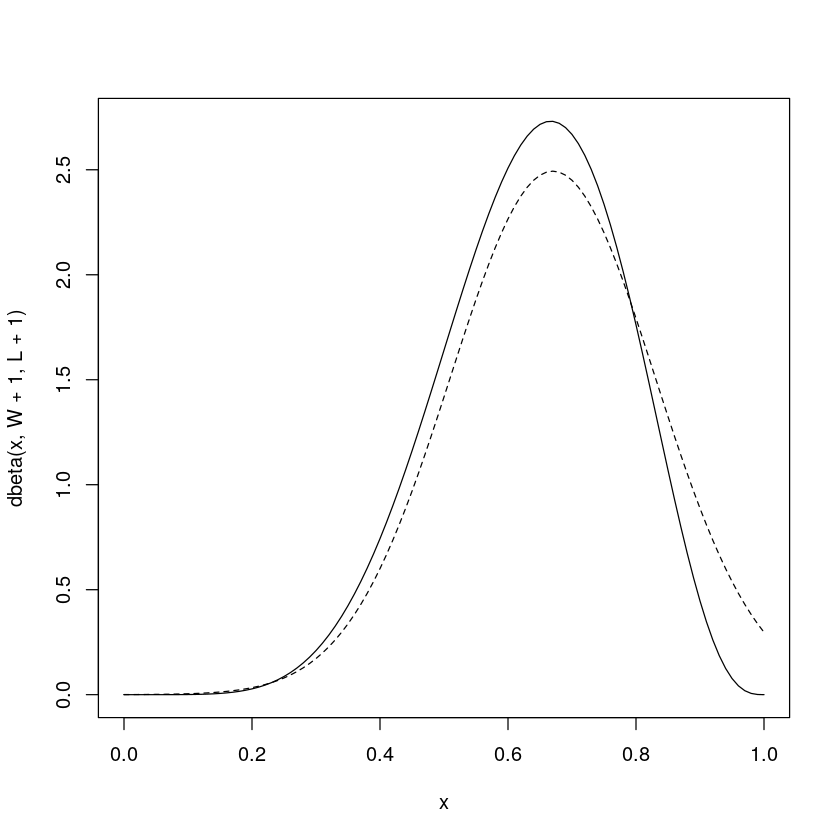

In [4]:
# analytical calculation
W <- 6
L <- 3
curve(dbeta(x, W +1, L + 1), from=0, to=1)

# quadratic approximation
curve(dnorm(x, 0.67, 0.16), lty=2, add=TRUE)

In [5]:
# sneak peak at MCMC
n_samples <- 1000
p <- rep(NA, n_samples) 
p[1] <- 0.5
W <- 6
L <- 3
for (i in 2:n_samples) {
    p_new <- rnorm(1, p[i-1], 0.1)
    if (p_new <0) p_new <- abs(p_new)
    if (p_new > 1) p_new <- 2 - p_new
    q0 <- dbinom(W, W + L, p[i-1]) 
    q1 <- dbinom(W, W + L, p_new)
    p[i] <- ifelse(runif(1) < q1/q0, p_new, p[i-1])
}

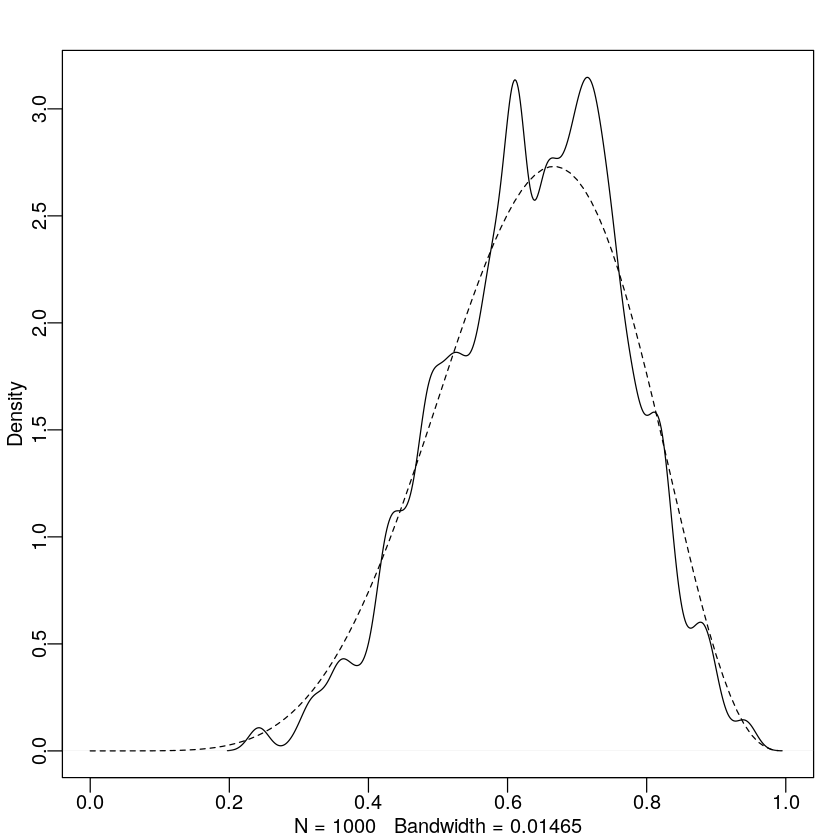

In [6]:
dens(p, xlim=c(0,1))
curve(dbeta(x, W+1, L+1), lty=2, add=TRUE)

# exercises

In [21]:
# define grid
p_grid <- seq(from=0, to=1, length.out=20)

# define prior
prior <- rep(1, 20)
# prior <- ifelse(p_grid < 0.5, 0, 1)
# prior <- exp(-5 * abs(p_grid - 0.5))

# compute likelihood at each value in grid
likelihood <- dbinom(5, size=7, prob=p_grid)

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

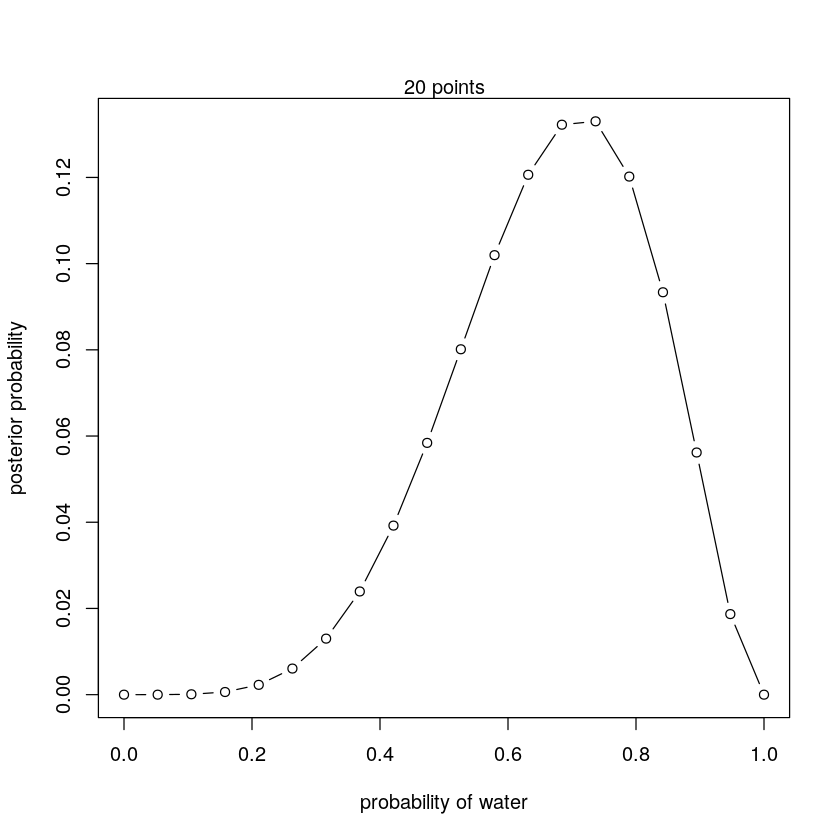

In [22]:
plot(p_grid, posterior, type="b", xlab="probability of water", ylab="posterior probability")
mtext("20 points")